In [89]:
import sys
import pandas as pd
import numpy as np
sys.path.append('../../')
from SynRBL.rsmi_utils import load_database
from SynRBL.SynMCS.mcs_utils import smiles_to_mol_parallel
from SynRBL.SynMCS import FindMissingGraphs
from rdkit import Chem
#bug = load_database('../../Data/MCS/Bug.json.gz')
bug = load_database('../../Data/MCS/Intersection_MCS_0_50_largest.json.gz')
msc_df = pd.DataFrame(bug)

              
mcs_results = msc_df['mcs_results'].to_list()
sorted_reactants = msc_df['sorted_reactants'].to_list()

mcs_mol_list = smiles_to_mol_parallel(mcs_results)
sorted_reactants_mol_list = smiles_to_mol_parallel(sorted_reactants)

In [90]:
find_graph = FindMissingGraphs()
missing_results = find_graph.find_single_graph_parallel(mcs_mol_list, sorted_reactants_mol_list, n_jobs=10, use_findMCS=True)
missing_final = pd.DataFrame(missing_results)

missing_final = missing_final.map(lambda x: np.nan if x == '' else x)
non_pass_df = missing_final.iloc[missing_final.dropna(subset=['issue']).index,:]
print('Bug:', len(non_pass_df))

[14:40:34] non-ring atom 4 marked aromatic
[14:40:34] non-ring atom 4 marked aromatic
[14:40:34] non-ring atom 4 marked aromatic
[14:40:34] non-ring atom 3 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic
[14:40:34] non-ring atom 0 marked aromatic
[14:40:34] non-ring atom 3 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic
[14:40:34] non-ring atom 0 marked aromatic
[14:40:34] non-ring atom 1 marked aromatic
[14:40:34] non-ring atom 4 marked aromatic
[14:40:34] non-ring atom 3 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic
[14:40:34] non-ring atom 0 marked aromatic
[14:40:34] non-ring atom 0 marked aromatic
[14:40:34] non-ring atom 0 marked aromatic
[14:40:34] non-ring atom 0 marked aromatic
[14:40:34] non-ring atom 3 marked aromatic
[14:40:34] non-ring atom 3 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic
[14:40:34] non-ring atom 3 marked aromatic
[14:40:34] 

Bug: 43


[14:40:34] non-ring atom 3 marked aromatic
[14:40:34] non-ring atom 0 marked aromatic
[14:40:34] non-ring atom 4 marked aromatic
[14:40:34] non-ring atom 0 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic
[14:40:34] non-ring atom 4 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic
[14:40:34] non-ring atom 3 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic
[14:40:34] non-ring atom 0 marked aromatic
[14:40:34] non-ring atom 2 marked aromatic


In [94]:
def check_for_bug(dataframe):
    ind_key = []
    for key, value in enumerate(dataframe['boundary_atoms_products']):
        if len(value) == 0:
            ind_key.append(key)

    bug_rows = dataframe.iloc[ind_key, :]
    return bug_rows
bug_data = check_for_bug(missing_final)
print('Bug:', len(bug_data))

Bug: 159


In [97]:
missing_final.drop(bug_data.index,axis=0)

,smiles,boundary_atoms_products,nearest_neighbor_products,issue
0,"[O, c1ccc(P(c2ccccc2)c2ccccc2)cc1]","[[{'O': 0}], [{'P': 4}]]","[[{'C': 1}], [{'C': 5}]]",NaN
1,[CC(C)(C)OC(=O)O],[[{'O': 7}]],[[{'C': 5}]],NaN
2,[NBr.O],"[[{'O': 2}, {'N': 0}, {'N': 0}]]","[[{'C': 1}, {'C': 1}, {'C': 4}]]",NaN
3,"[N, I]","[[{'N': 0}], [{'I': 0}]]","[[{'C': 8}], [{'C': 1}]]",NaN
4,"[O, CC(C)[PH+](c1ccccc1)c1ccccc1]","[[{'O': 0}], [{'P': 3}]]","[[{'C': 1}], [{'C': 4}]]",NaN
...,...,...,...,...
1206,[O],[[{'O': 0}]],[[{'C': 5}]],NaN
1208,[O],[[{'O': 0}]],[[{'C': 0}]],NaN
1210,[O],[[{'O': 0}]],[[{'C': 5}]],NaN
1212,[O],[[{'O': 0}]],[[{'C': 6}]],NaN


In [93]:
check_for_bug(missing_final).shape

(159, 4)

In [80]:
non_pass_df['issue']

,smiles,boundary_atoms_products,nearest_neighbor_products,issue
7,[],[],[],Python argument types in\n RWMol.__init__(R...
38,[],[],[],Python argument types in\n RWMol.__init__(R...
72,[],[],[],Python argument types in\n RWMol.__init__(R...
82,[],[],[],Python argument types in\n RWMol.__init__(R...
84,[],[],[],Python argument types in\n RWMol.__init__(R...
85,[],[],[],Python argument types in\n RWMol.__init__(R...
96,[],[],[],Python argument types in\n RWMol.__init__(R...
111,[],[],[],Python argument types in\n RWMol.__init__(R...
136,[],[],[],Python argument types in\n RWMol.__init__(R...
144,[],[],[],Python argument types in\n RWMol.__init__(R...


In [21]:
missing_results

[{'smiles': ['O=COCc1ccccc1'],
  'boundary_atoms_products': [[{'C': 1}]],
  'nearest_neighbor_products': [[{'N': 9}]],
  'issue': ''},
 {'smiles': ['CC1(C)OBOC1(C)C', 'Br'],
  'boundary_atoms_products': [[{'B': 4}], [{'Br': 0}]],
  'nearest_neighbor_products': [[{'C': 5}], [{'C': 13}]],
  'issue': ''},
 {'smiles': ['CC(C)C'],
  'boundary_atoms_products': [[{'C': 1}]],
  'nearest_neighbor_products': [[{'O': 4}]],
  'issue': ''},
 {'smiles': ['COc1ccc(C)cc1'],
  'boundary_atoms_products': [[{'C': 6}]],
  'nearest_neighbor_products': [[{'N': 8}]],
  'issue': ''},
 {'smiles': ['C'],
  'boundary_atoms_products': [[{'C': 0}]],
  'nearest_neighbor_products': [[{'O': 1}]],
  'issue': ''},
 {'smiles': ['Cc1ccccc1'],
  'boundary_atoms_products': [[{'C': 0}]],
  'nearest_neighbor_products': [[{'N': 17}]],
  'issue': ''},
 {'smiles': ['C[SiH](C)C'],
  'boundary_atoms_products': [[{'Si': 1}]],
  'nearest_neighbor_products': [[{'C': 4}]],
  'issue': ''},
 {'smiles': ['C'],
  'boundary_atoms_products

In [12]:
def is_mapping_correct(mol, symbol_to_index):
    # Convert the molecule to a dictionary of atom indices to symbols
    molecule_dict = {atom.GetIdx(): atom.GetSymbol() for atom in mol.GetAtoms()}
    
    # Check if the mappings are consistent
    for symbol, index in symbol_to_index.items():
        if index not in molecule_dict:
            return False
        if molecule_dict[index] != symbol:
            return False
    
    return True
#is_mapping_correct(mol=Chem.MolFromSmiles('O=COCc1ccccc1'), symbol_to_index={'C': 1})
all_conditions_met = all(is_mapping_correct(Chem.MolFromSmiles(smiles_list[key]), boundary_atoms_products[key][0]) for key in range(len(smiles_list)))


In [19]:
missing_results

[{'smiles': ['O=COCc1ccccc1'],
  'boundary_atoms_products': [[{'C': 1}]],
  'nearest_neighbor_products': [[{'N': 9}]],
  'issue': ''},
 {'smiles': ['CC1(C)OBOC1(C)C', 'Br'],
  'boundary_atoms_products': [[{'B': 4}], [{'Br': 0}]],
  'nearest_neighbor_products': [[{'C': 5}], [{'C': 13}]],
  'issue': ''},
 {'smiles': ['CC(C)C'],
  'boundary_atoms_products': [[{'C': 1}]],
  'nearest_neighbor_products': [[{'O': 4}]],
  'issue': ''},
 {'smiles': ['COc1ccc(C)cc1'],
  'boundary_atoms_products': [[{'C': 6}]],
  'nearest_neighbor_products': [[{'N': 8}]],
  'issue': ''}]

In [24]:
fail = []
check = []
for check_dict in missing_results:
    smiles_list = check_dict['smiles']
    boundary_list = check_dict['boundary_atoms_products']

    all_conditions_met = all(is_mapping_correct(Chem.MolFromSmiles(smiles_list[key]), boundary_list[key][0]) for key in range(len(smiles_list)))
    print(all_conditions_met)
    if all_conditions_met:
        check.append(smiles_list)
    else:
        fail.append(smiles_list)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [56]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from joblib import Parallel, delayed
from rdkit.Chem import rdmolops
import copy

def add_hydrogens_to_radicals(mol: Chem.Mol) -> Chem.Mol:
    """
    Add hydrogen atoms to radical sites in a molecule.

    Args:
    - mol (Chem.Mol): RDKit molecule object.

    Returns:
    - Chem.Mol: The modified molecule with added hydrogens.
    """
    # Create a copy of the molecule
    mol_with_h = Chem.RWMol(mol)

    # Add explicit hydrogens (not necessary if they are already present in the input molecule)
    mol_with_h = rdmolops.AddHs(mol_with_h)

    # Find and process radical atoms
    for atom in mol_with_h.GetAtoms():
        num_radical_electrons = atom.GetNumRadicalElectrons()
        if num_radical_electrons > 0:
            atom.SetNumExplicitHs(atom.GetNumExplicitHs() + num_radical_electrons)
            atom.SetNumRadicalElectrons(0)
    
    curate_mol = Chem.RemoveHs(mol_with_h)
    return curate_mol

def map_parent_to_child(parent_mol, child_mol, key_base):
    # Get atom indices in the parent molecule that match the entire child molecule
    parent_mcs_indices = parent_mol.GetSubstructMatch(child_mol)

    # Create a mapping of parent atom indices to child atom indices
    atom_mapping = {}
    for child_idx, parent_idx in enumerate(parent_mcs_indices):
        map_key = key_base[parent_idx]
        atom_mapping[map_key] = child_idx

    return atom_mapping

In [15]:
smiles_list

['COc1ccc(C)cc1']

In [14]:
len(check)

4

In [59]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from joblib import Parallel, delayed
from rdkit.Chem import rdmolops
import copy
class FindMissingGraphs:
    """
    A class for finding missing parts, boundary atoms, and nearest neighbors in a list of reactant molecules.

    Usage:
    1. Create an instance of the class.
    2. Use the class methods to find missing parts, boundary atoms, and nearest neighbors for a list of molecules.

    Example:
    ```
    fm = FindMissingGraphs()
    missing_results = fm.find_single_graph(mcs_mol_list, sorted_reactants_mol_list)
    ```

    Note: This class requires the RDKit library to be installed.

    Attributes:
    None

    Methods:
    - find_missing_parts_pairs: Analyze a list of molecules and identify missing parts, boundary atoms, and nearest neighbors.
    - find_single_graph: Find missing parts, boundary atoms, and nearest neighbors for a list of reactant molecules.
    - find_single_graph_parallel: Find missing parts, boundary atoms, and nearest neighbors in parallel for a list of reactant molecules.
    """

    def __init__(self):
        pass

    @staticmethod
    def find_missing_parts_pairs(mol_list, mcs_list=None, use_findMCS=False, params=None):
        """
        This function analyzes each molecule in a given list and identifies the parts that are not 
        present in the corresponding Maximum Common Substructure (MCS). It also finds the boundary 
        atoms and nearest neighbors for each molecule.

        Parameters:
        - mol_list (list of rdkit.Chem.Mol): The list of RDKit molecule objects to analyze.
        - mcs_list (list of rdkit.Chem.Mol or None): List of RDKit molecule objects representing MCS, 
        corresponding to each molecule in mol_list. If None, MCS will be calculated using RDKit's rdFMCS.
        - use_findMCS (bool): Whether to use RDKit's rdFMCS to find MCS and remove it from mol_list.
        - params (rdkit.Chem.rdFMCS.MCSParameters): Parameters for RDKit's rdFMCS.

        Returns:
        Tuple containing:
        - list of rdkit.Chem.Mol or None: RDKit molecule objects representing the missing parts 
        of each molecule, or None if no missing parts are found.
        - list of lists: Each sublist contains the boundary atoms of the corresponding molecule.
        - list of lists: Each sublist contains the nearest neighbors of the corresponding molecule.
        """
        missing_parts_list = []
        boundary_atoms_lists = []
        nearest_neighbor_lists = []

        for mol, mcs_mol in zip(mol_list, mcs_list):
            atoms_to_remove = set()
            boundary_atoms_list = []
            nearest_neighbor_list = []

            if use_findMCS:
                #Chem.SanitizeMol(mol)
                #Chem.SanitizeMol(mol)
                # Calculate MCS using RDKit's rdFMCS
                mcs = rdFMCS.FindMCS([mol, mcs_mol])
                mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
                
            
            try:
                if mcs_mol:
                    # Special case handling (e.g., single oxygen atom)
                    if Chem.MolToSmiles(mcs_mol) == 'O':
                        smarts_pattern = '[OH]'
                        smarts_mol = Chem.MolFromSmarts(smarts_pattern)
                        substructure_match = mol.GetSubstructMatch(smarts_mol)
                        rw_mol = Chem.RWMol(mol)
                        rw_mol.RemoveAtom(substructure_match[0])
                        missing_part = rw_mol.GetMol()
                        boundary_atoms = [{'O': 0}]
                        nearest_atoms = [{'O': 0}]
                    else:
                        raise ValueError
            except:
                if mcs_mol:
                    # Finding substructure matches
                    substructure_match = mol.GetSubstructMatch(mcs_mol)
                    if substructure_match:
                        atoms_to_remove.update(substructure_match)

                    
                    left_number = []
                    for i in range(mol.GetNumAtoms()):
                        if i not in substructure_match:
                            left_number.append(i)

                    
                    # Creating the molecule of missing parts
                    missing_part = Chem.RWMol(mol)
                    for idx in sorted(atoms_to_remove, reverse=True):
                        missing_part.RemoveAtom(idx)


                    missing_part_old = copy.deepcopy(missing_part)
                   

                    if missing_part is not None:
                        missing_part = Chem.MolFromSmiles(Chem.MolToSmiles(missing_part))
                     
                        missing_part = FindMissingGraphs.add_hydrogens_to_radicals(missing_part)
                        atom_mapping = FindMissingGraphs.map_parent_to_child(missing_part_old, missing_part, left_number)
                        
                    
                    else:
                        index_mapping = {idx: i for i, idx in enumerate(sorted(set(range(mol.GetNumAtoms())) - atoms_to_remove))}

                    boundary_atoms = []
                    nearest_atoms = []

                    # Identifying boundary atoms and nearest neighbors
                    for atom_idx in substructure_match:
                        #display(mol)
                        if atom_idx < mol.GetNumAtoms():
                            atom_symbol = mol.GetAtomWithIdx(atom_idx).GetSymbol()
                            neighbors = mol.GetAtomWithIdx(atom_idx).GetNeighbors()
                            # Loop through neighbors to find boundary atoms and nearest neighbors
                            for neighbor in neighbors:
                                if neighbor.GetIdx() not in substructure_match:
                                    nearest_atoms.append({atom_symbol: atom_idx})
                                
                                    #boundary_atoms.append({neighbor.GetSymbol(): atom_mapping[neighbor.GetIdx()]})
                                    #renumerate_idx = atom_mapping.get(neighbor.GetIdx(), -1)
                                    if missing_part:
                                        renumerate_idx = atom_mapping.get(neighbor.GetIdx(), -1)
                                    else:
                                        renumerate_idx = index_mapping.get(neighbor.GetIdx(), -1)
                                    if renumerate_idx != -1:
                                        boundary_atoms.append({neighbor.GetSymbol(): renumerate_idx})

                if boundary_atoms:
                    boundary_atoms_list.append(boundary_atoms)
                if nearest_atoms:
                    nearest_neighbor_list.append(nearest_atoms)

            try:
                Chem.SanitizeMol(missing_part)
                if missing_part.GetNumAtoms() > 0:
                    missing_parts_list.append(missing_part)
                    boundary_atoms_lists.extend(boundary_atoms_list)
                    nearest_neighbor_lists.extend(nearest_neighbor_list)
                else:
                    #missing_parts_list.append(None)
                    boundary_atoms_lists.extend([])
                    nearest_neighbor_lists.extend([])
            except:
                #missing_parts_list.append(None)
                boundary_atoms_lists.extend([])
                nearest_neighbor_lists.extend([])

        return missing_parts_list, boundary_atoms_lists, nearest_neighbor_lists
    

    @staticmethod
    def find_single_graph(mcs_mol_list, sorted_reactants_mol_list, use_findMCS=True):
        """
        Find missing parts, boundary atoms, and nearest neighbors for a list of reactant molecules
        using a corresponding list of MCS (Maximum Common Substructure) molecules.

        Parameters:
        - mcs_mol_list (list of rdkit.Chem.Mol): List of RDKit molecule objects representing the MCS,
        corresponding to each molecule in sorted_reactants_mol_list.
        - sorted_reactants_mol_list (list of rdkit.Chem.Mol): The list of RDKit molecule objects to analyze.

        Returns:
        - Dictionary containing:
        - 'smiles' (list of list of str): SMILES representations of the missing parts for each molecule.
        - 'boundary_atoms_products' (list of list of dict): Lists of boundary atoms for each molecule.
        - 'nearest_neighbor_products' (list of list of dict): Lists of nearest neighbors for each molecule.
        - 'issue' (list): Any issues encountered during processing.
        """
        missing_results = {'smiles': [], 'boundary_atoms_products': [], 'nearest_neighbor_products': [], 'issue': []}
        for i in zip(sorted_reactants_mol_list, mcs_mol_list):
            try:
                mols, boundary_atoms_products, nearest_neighbor_products = FindMissingGraphs.find_missing_parts_pairs(i[0], i[1], use_findMCS=use_findMCS)
                missing_results['smiles'].append([Chem.MolToSmiles(mol) for mol in mols])
                missing_results['boundary_atoms_products'].append(boundary_atoms_products)
                missing_results['nearest_neighbor_products'].append(nearest_neighbor_products)
                missing_results['issue'].append([])
            except Exception as e:
                missing_results['smiles'].append([])
                missing_results['boundary_atoms_products'].append([])
                missing_results['nearest_neighbor_products'].append([])
                missing_results['issue'].append(str(e))
        return missing_results

    @staticmethod
    def find_single_graph_parallel(mcs_mol_list, sorted_reactants_mol_list, n_jobs=-1, use_findMCS=True):
        """
        Find missing parts, boundary atoms, and nearest neighbors for a list of reactant molecules
        using a corresponding list of MCS (Maximum Common Substructure) molecules in parallel.

        Parameters:
        - mcs_mol_list (list of rdkit.Chem.Mol): List of RDKit molecule objects representing the MCS,
        corresponding to each molecule in sorted_reactants_mol_list.
        - sorted_reactants_mol_list (list of rdkit.Chem.Mol): The list of RDKit molecule objects to analyze.
        - n_jobs (int): The number of parallel jobs to run. Default is -1, which uses all available CPU cores.

        Returns:
        - List of dictionaries, where each dictionary contains:
        - 'smiles' (list of str): SMILES representations of the missing parts for each molecule.
        - 'boundary_atoms_products' (list of dict): Lists of boundary atoms for each molecule.
        - 'nearest_neighbor_products' (list of dict): Lists of nearest neighbors for each molecule.
        - 'issue' (str): Any issues encountered during processing.
        """
        def process_single_pair(reactant_mol, mcs_mol, use_findMCS=True):
            try:
                mols, boundary_atoms_products, nearest_neighbor_products = FindMissingGraphs.find_missing_parts_pairs(reactant_mol, mcs_mol, use_findMCS=use_findMCS)
                return {
                    'smiles': [Chem.MolToSmiles(mol) for mol in mols],
                    'boundary_atoms_products': boundary_atoms_products,
                    'nearest_neighbor_products': nearest_neighbor_products,
                    'issue': ''
                }
            except Exception as e:
                return {
                    'smiles': [],
                    'boundary_atoms_products': [],
                    'nearest_neighbor_products': [],
                    'issue': str(e)
                }

        results = Parallel(n_jobs=n_jobs)(delayed(process_single_pair)(reactant_mol, mcs_mol, use_findMCS=use_findMCS) for reactant_mol, mcs_mol in zip(sorted_reactants_mol_list, mcs_mol_list))
        return results
    
 
    @staticmethod
    def map_parent_to_child(parent_mol, child_mol, key_base):
        # Get atom indices in the parent molecule that match the entire child molecule
        parent_mcs_indices = parent_mol.GetSubstructMatch(child_mol)

        # Create a mapping of parent atom indices to child atom indices
        atom_mapping = {}
        for child_idx, parent_idx in enumerate(parent_mcs_indices):
            map_key = key_base[parent_idx]
            atom_mapping[map_key] = child_idx

        return atom_mapping
    
    @staticmethod
    def is_mapping_correct(mol, symbol_to_index):
        # Convert the molecule to a dictionary of atom indices to symbols
        molecule_dict = {atom.GetIdx(): atom.GetSymbol() for atom in mol.GetAtoms()}
        
        # Check if the mappings are consistent
        for symbol, index in symbol_to_index.items():
            if index not in molecule_dict:
                return False
            if molecule_dict[index] != symbol:
                return False
        
        return True
    
    @staticmethod
    def add_hydrogens_to_radicals(mol: Chem.Mol) -> Chem.Mol:
        """
        Add hydrogen atoms to radical sites in a molecule.

        Args:
        - mol (Chem.Mol): RDKit molecule object.

        Returns:
        - Chem.Mol: The modified molecule with added hydrogens.
        """
        # Create a copy of the molecule
        mol_with_h = Chem.RWMol(mol)

        # Add explicit hydrogens (not necessary if they are already present in the input molecule)
        mol_with_h = rdmolops.AddHs(mol_with_h)

        # Find and process radical atoms
        for atom in mol_with_h.GetAtoms():
            num_radical_electrons = atom.GetNumRadicalElectrons()
            if num_radical_electrons > 0:
                atom.SetNumExplicitHs(atom.GetNumExplicitHs() + num_radical_electrons)
                atom.SetNumRadicalElectrons(0)
        
        curate_mol = Chem.RemoveHs(mol_with_h)
        return curate_mol
    

In [6]:
def check_bug(missing_results):
    missing_final = pd.DataFrame(missing_results)
    missing_final = missing_final.map(lambda x: np.nan if x == '' else x)
    non_pass_df = missing_final.iloc[missing_final.dropna(subset=['issue']).index,:].to_dict(orient='records')
    print('Bug in Issues:', len(non_pass_df))

    ind_key = []
    for key, value in enumerate(missing_final['boundary_atoms_products']):
        if len(value)==0:
            ind_key.append(key)

    
    print('No Boundary atoms:', len(missing_final.iloc[ind_key,:]))



In [8]:
check_bug(missing_results)

Bug in Issues: 0
No Boundary atoms: 2


In [82]:
ind_key = []
for key, value in enumerate(missing_final['boundary_atoms_products']):
    if len(value)==0:
        ind_key.append(key)

bug_check = missing_final.iloc[ind_key,:]

In [83]:
bug_check

,smiles,boundary_atoms_products,nearest_neighbor_products,issue
7,[],[],[],Python argument types in\n RWMol.__init__(R...
38,[],[],[],Python argument types in\n RWMol.__init__(R...
72,[],[],[],Python argument types in\n RWMol.__init__(R...
82,[],[],[],Python argument types in\n RWMol.__init__(R...
84,[],[],[],Python argument types in\n RWMol.__init__(R...
...,...,...,...,...
1209,[],[],[],NaN
1211,[],[],[],NaN
1214,[],[],[],NaN
1215,[],[],[],NaN


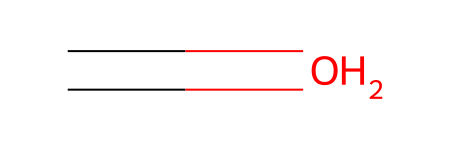

In [87]:
sorted_reactants_mol_list[1216][1]

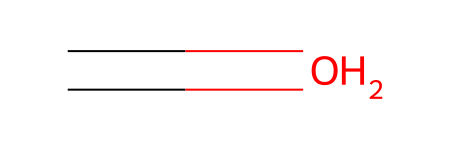

In [88]:
mcs_mol_list[1216][1]

In [63]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from joblib import Parallel, delayed
from rdkit.Chem import rdmolops
mcs = rdFMCS.FindMCS([sorted_reactants_mol_list[2305][0], mcs_mol_list[2305][0]])
mcs_mol = Chem.MolFromSmarts(mcs.smartsString)

In [70]:
sorted_reactants_mol_list[2305]

In [71]:
mcs_mol_list[2305]

In [72]:
find = FindMissingGraphs()
find.find_missing_parts_pairs(sorted_reactants_mol_list[2305], mcs_mol_list[2305], use_findMCS=True)

([], [], [])

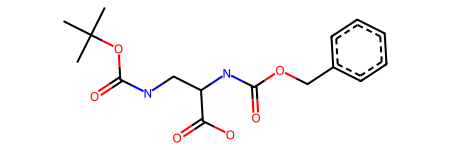

In [60]:
mcs_mol

In [44]:
atoms_to_remove = set()
substructure_match = sorted_reactants_mol_list[2350][0].GetSubstructMatch(mcs_mol)
if substructure_match:
    atoms_to_remove.update(substructure_match)


left_number = []
for i in range(sorted_reactants_mol_list[2350][0].GetNumAtoms()):
    if i not in substructure_match:
        left_number.append(i)


In [57]:
import copy
missing_part = Chem.RWMol(sorted_reactants_mol_list[2350][0])
for idx in sorted(atoms_to_remove, reverse=True):
    missing_part.RemoveAtom(idx)

missing_part_old = copy.deepcopy(missing_part)
missing_part = Chem.MolFromSmiles(Chem.MolToSmiles(missing_part))

missing_part = add_hydrogens_to_radicals(missing_part)
atom_mapping = map_parent_to_child(missing_part_old, missing_part, left_number)

In [58]:
atom_mapping

{0: 0}

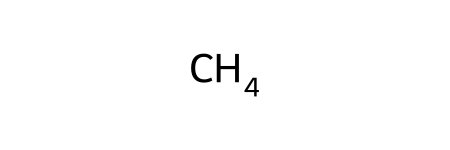

In [52]:
missing_part

In [ ]:
substructure_match = mol.GetSubstructMatch(mcs_mol)
if substructure_match:
atoms_to_remove.update(substructure_match)


left_number = []
for i in range(mol.GetNumAtoms()):
if i not in substructure_match:
    left_number.append(i)


# Creating the molecule of missing parts
missing_part = Chem.RWMol(mol)
for idx in sorted(atoms_to_remove, reverse=True):
missing_part.RemoveAtom(idx)

In [ ]:
def is_mapping_correct(mol, symbol_to_index):
    # Convert the molecule to a dictionary of atom indices to symbols
    molecule_dict = {atom.GetIdx(): atom.GetSymbol() for atom in mol.GetAtoms()}
    
    # Check if the mappings are consistent
    for symbol, index in symbol_to_index.items():
        if index not in molecule_dict:
            return False
        if molecule_dict[index] != symbol:
            return False
    
    return True
is_mapping_correct(mol=Chem.MolFromSmiles('O=COCc1ccccc1'), symbol_to_index={'C': 1})